In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
df = pd.read_csv("/content/drive/MyDrive/10_kaggle/house_price/train.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

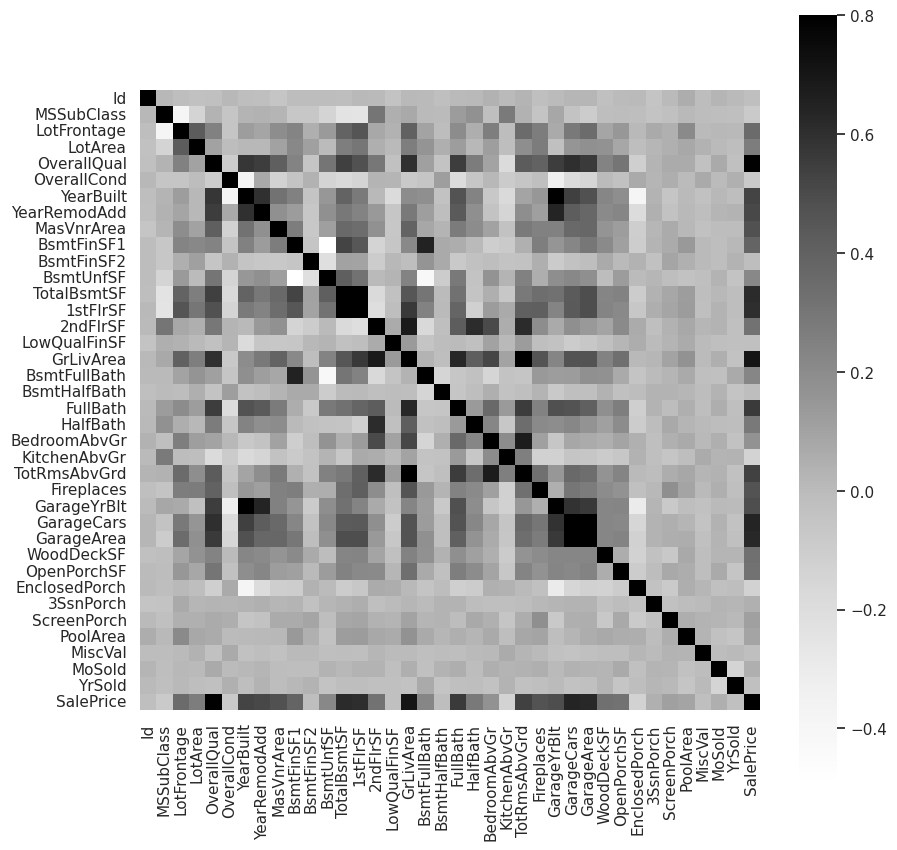

In [41]:
corr = df.corr()
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(corr, vmax=0.8, cmap='Greys', square=True)

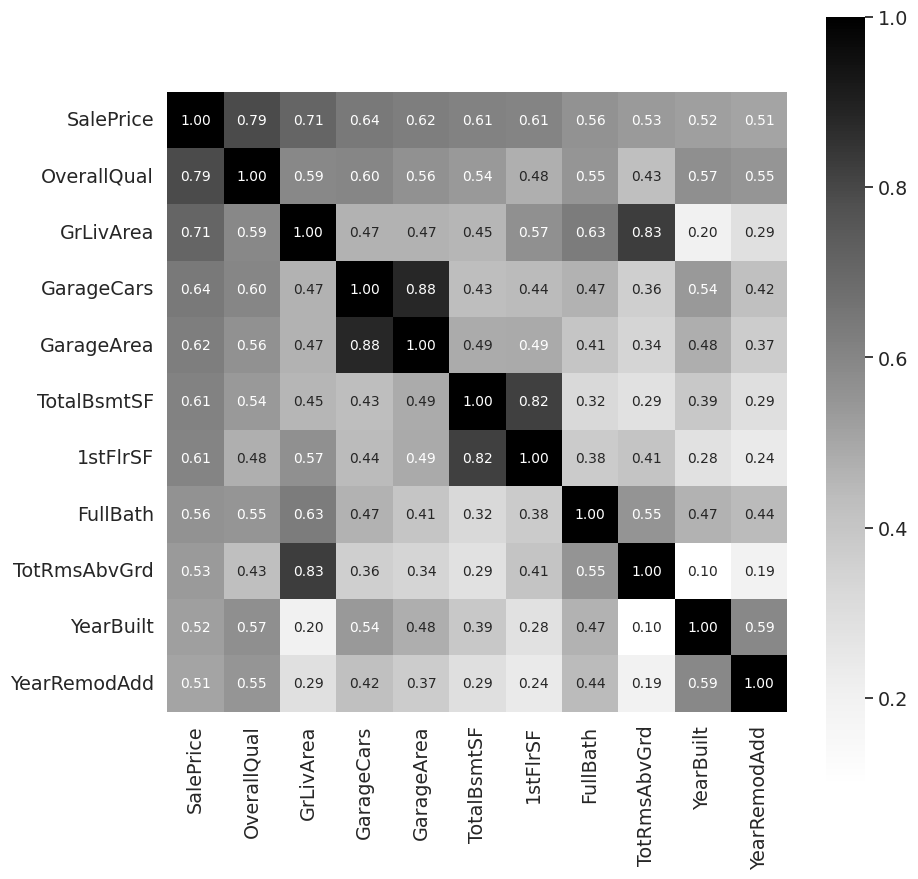

In [42]:
k = 11
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values , cmap='Greys')
plt.show()

In [43]:
y_corr = corr['SalePrice']
y_corr[y_corr>0.6]

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

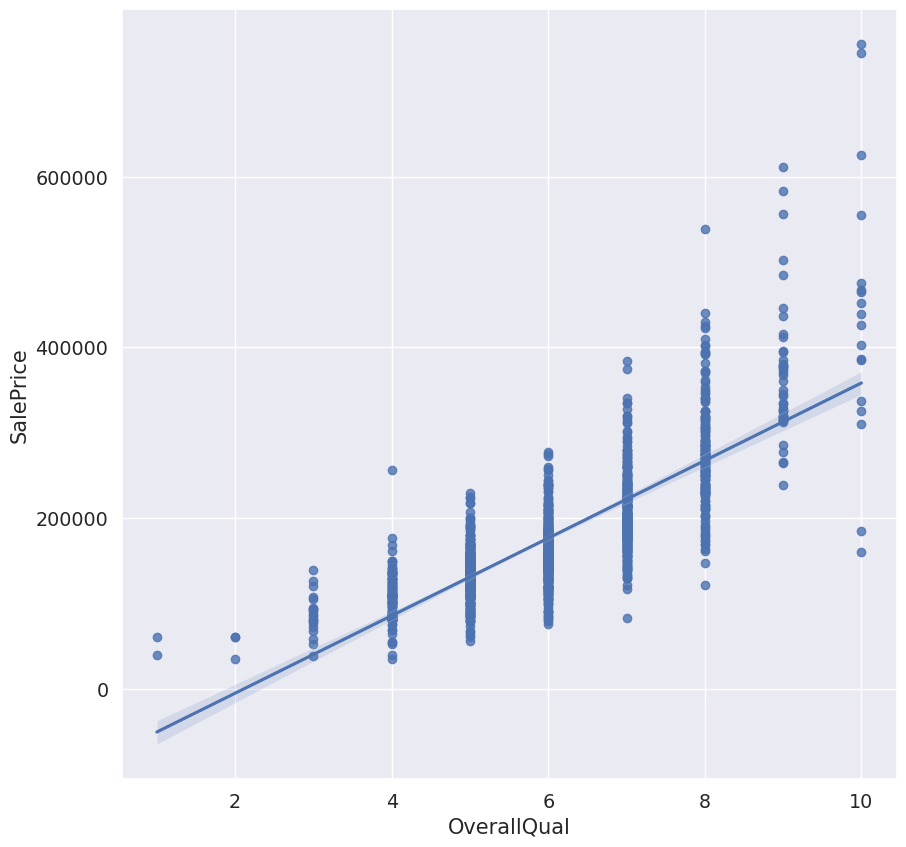

In [47]:
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
sns.regplot(x='OverallQual', y='SalePrice', data=data)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

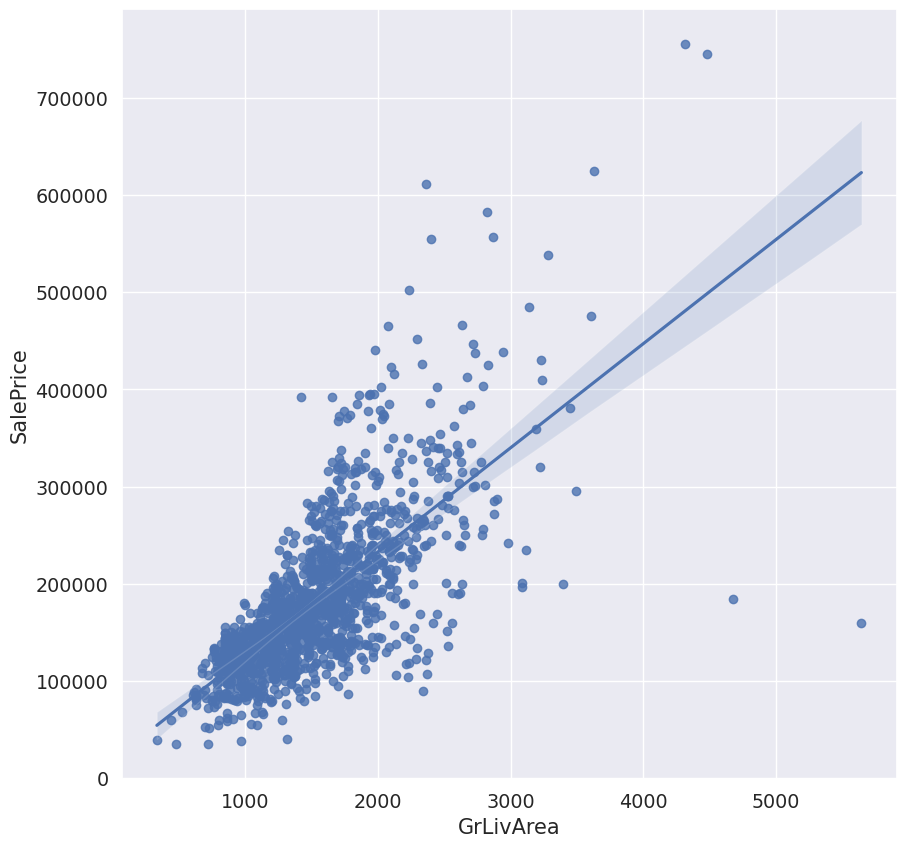

In [48]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
sns.regplot(x='GrLivArea', y='SalePrice', data=data)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

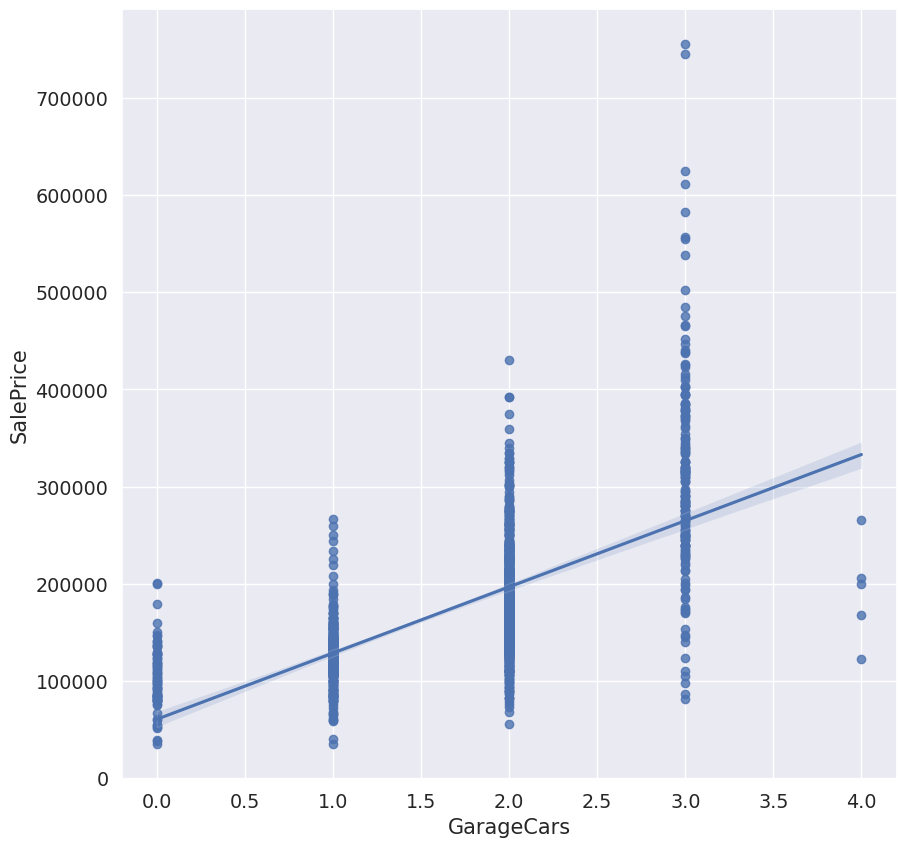

In [49]:
data = pd.concat([df['SalePrice'], df['GarageCars']], axis=1)
sns.regplot(x='GarageCars', y='SalePrice', data=data)

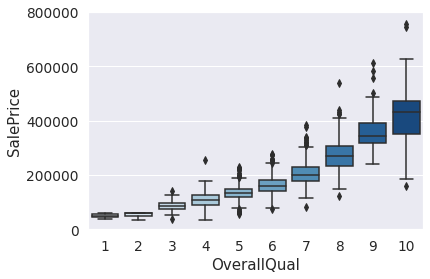

In [ ]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots()
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data, palette="Blues")
fig.axis(ymin=0, ymax=800000);

In [50]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageCars']
df2 = df[cols].dropna()
df2.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageCars
0,208500,7,1710,2,856,2
1,181500,6,1262,2,1262,2
2,223500,7,1786,2,920,2
3,140000,7,1717,3,756,3
4,250000,8,2198,3,1145,3


In [51]:
import statsmodels.formula.api as smf

for c in cols:
    model = smf.ols(formula='SalePrice ~ {}'.format(c), data=df2)
    result = model.fit()
    print(c,result.rsquared)

SalePrice 1.0
OverallQual 0.6256518924621179
GrLivArea 0.5021486502718042
GarageCars 0.41012393993308693
TotalBsmtSF 0.37648109325168644
GarageCars 0.41012393993308693


In [52]:
best_degree = 1
best_r_squared = 0
sound_degree = 1
best_r_squared_adj = 0

degree = 'SalePrice ~ OverallQual'
for i in range(2, 21):
    degree += ' + np.power(OverallQual, {})'.format(i)
    model = smf.ols(formula=degree, data=df2)
    result = model.fit()
    print('degree={}: '.format(i), result.rsquared, ":", result.rsquared_adj)
    if result.rsquared > best_r_squared:
        best_r_squared = result.rsquared
        best_degree = i

    if result.rsquared_adj > best_r_squared_adj:
        best_r_squared_adj = result.rsquared_adj
        sound_degree = i

print('best_degree: ', best_degree)
print('best_r_squared: ', best_r_squared)
print('sound_degree: ', sound_degree)
print('best_r_squared_ad: ',best_r_squared_adj)

degree=2:  0.6784507354727529 : 0.678009350071892
degree=3:  0.6815000790414094 : 0.6808438292042694
degree=4:  0.6824966332299491 : 0.6816237717405469
degree=5:  0.6839537783809774 : 0.6828669619379959
degree=6:  0.6840202510958547 : 0.682715448278632
degree=7:  0.6840671798661202 : 0.6825440877580367
degree=8:  0.6840737001840774 : 0.6823318597991516
degree=9:  0.6841812868530395 : 0.6822210327714376
degree=10:  0.684181286853053 : 0.6822210327714513
degree=11:  0.684181286852044 : 0.6822210327704361
degree=12:  0.6841812868355779 : 0.6822210327538677
degree=13:  0.6841812856778859 : 0.6822210315889901
degree=14:  0.6841812794543431 : 0.6824400322011623
degree=15:  0.6838012253112105 : 0.6822768510530689
degree=16:  0.6832586165158239 : 0.6817316263750599
degree=17:  0.6831345398831987 : 0.6816069515768505
degree=18:  0.6830337714570379 : 0.6817248950831509
degree=19:  0.6829330981353113 : 0.6816238060422707
degree=20:  0.6828641076009809 : 0.6815545306192919
best_degree:  10
best_r_